<a href="https://colab.research.google.com/github/13020363/UTS_ML2019_ID13020363/blob/master/Decision_Tree_Barca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Airbnb in Barca

### 1.Load dataset

In [0]:
# Load libraries
import pandas as pd
import numpy as np
from numpy import array
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import KBinsDiscretizer

In [8]:
col_names = ['room_type', 'neighborhood', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude']
# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/13020363/UTS_ML2019_ID13020363/master/barca.csv", header=None, names=col_names)
pima.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,Shared room,Eixample,27,4.5,10,1,264,41.391617,2.162516
1,Shared room,Sants-Montjuïc,13,4.0,12,1,129,41.373268,2.170138
2,Shared room,Sants-Montjuïc,11,4.0,12,1,129,41.372360,2.169215
3,Shared room,Eixample,9,5.0,2,1,72,41.391836,2.154014
4,Shared room,Eixample,10,5.0,2,1,64,41.387623,2.148761


### 2.Data exploration

In [0]:
#get the required pacakges
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import plotting
from string import ascii_letters

#### 2.1 Statistics

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f834463cb70>,
      dtype=object)

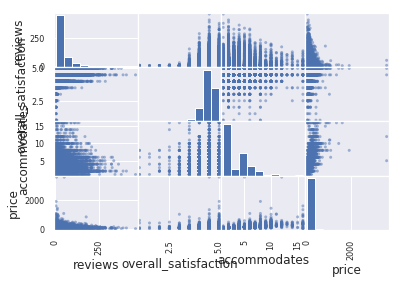

In [146]:
#display statistics of the numerical features
plotting.scatter_matrix(pima[['reviews', 'overall_satisfaction', 'accommodates', 'price']])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


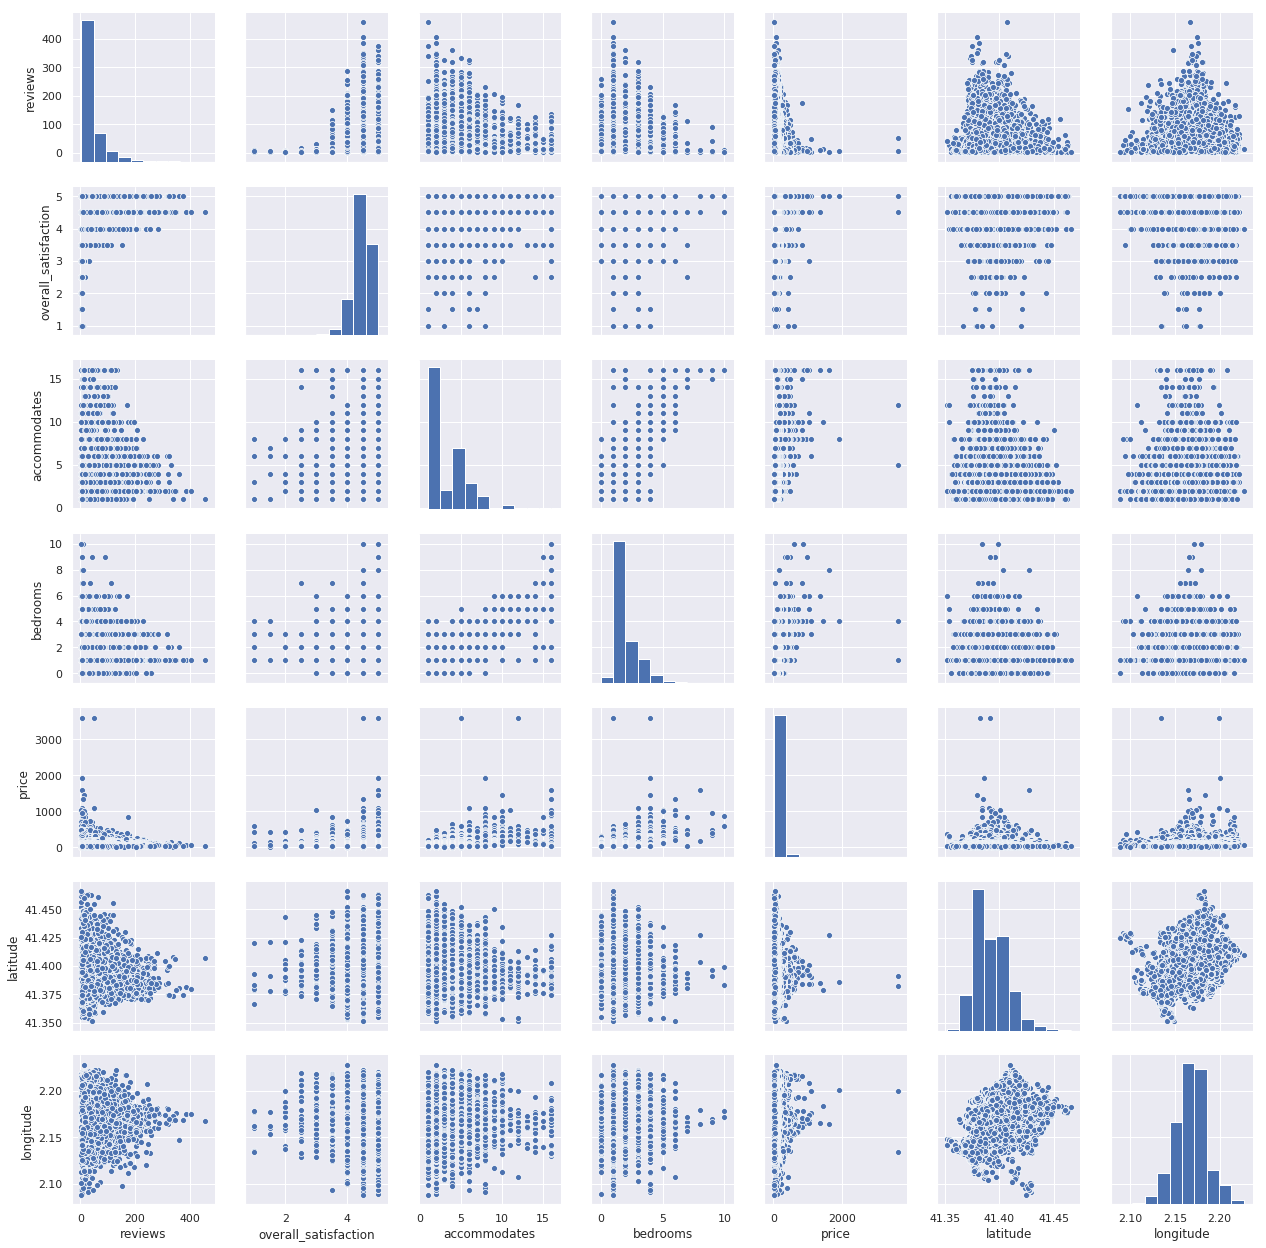

In [144]:
#display statistics of the numerical features using pairplot
sns.set()
names = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude']
sns.pairplot(pima[names], size=2.5)
plt.show()

#### 2.2 Pie chart

In [0]:
#the funcation of drawing a pie chart
def pie_chart(pname):
  pie_name = pname

  rt_group = pima[pie_name].value_counts()
  
  # Pie chart, where the slices will be ordered and plotted counter-clockwise:
  labels = pima[pie_name].unique()
  sizes = array(rt_group)

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

  plt.show()

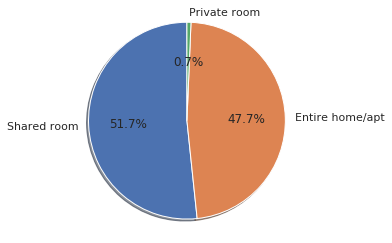

In [150]:
#pie chart of room_type
pie_chart('room_type')

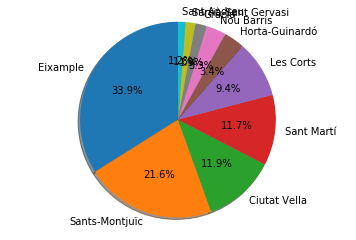

In [99]:
#pie chart of neighborhood
pie_chart('neighborhood')

#### 2.3 Boxplot

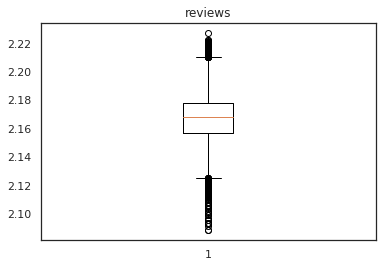

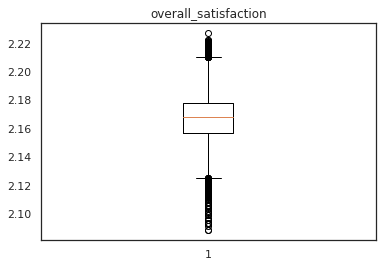

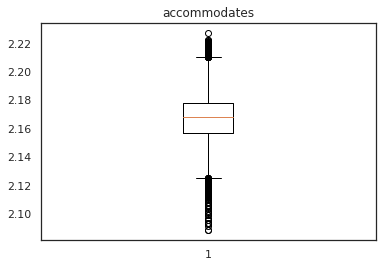

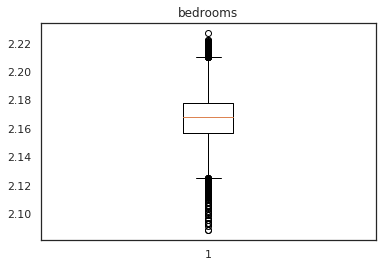

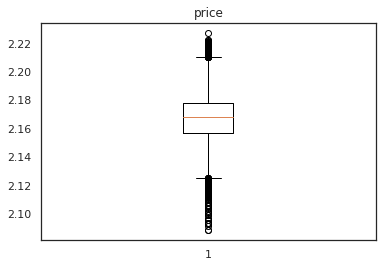

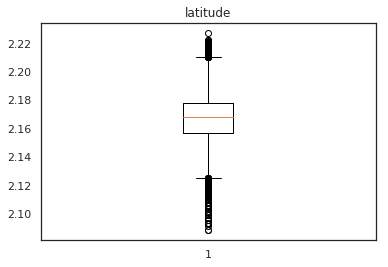

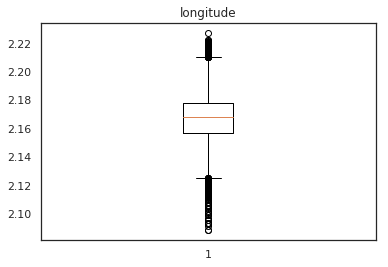

In [151]:
#display boxplots of reviews, overall_satisfaction, accommodates, bedrooms, price, latitude and longitude

names = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude']
for boxplot_name in names:
  fig, ax = plt.subplots()
  ax.set_title(boxplot_name)
  ax.boxplot(pima[name])

#### 2.4 Correlation matrix

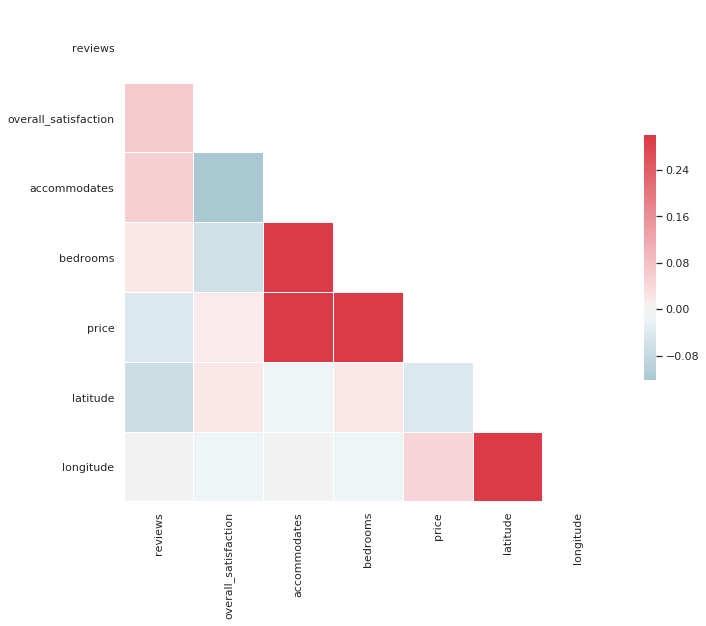

In [156]:
#display correlation matrix
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
col_names_cm = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude']
d = pima[col_names_cm]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 3.Preprocess

#### 3.1 Convert categorical variable to numeric

In [0]:
#convert the types of room_type and neighborhuud to numeric columns called room_typecategory and neighborhoodcategory
cvTn_names = ['room_type', 'neighborhood']

for cvTn_name in cvTn_names:
  new_name = cvTn_name + 'category'
  pima[cvTn_name] = pima[cvTn_name].astype('category')
  pima[new_name] = pima[cvTn_name].cat.codes

In [0]:
pima.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,room_type_category,room_typecategory,neighborhoodcategory
0,Shared room,Eixample,27,4.5,10,1,264,41.391617,2.162516,2,2,1
1,Shared room,Sants-Montjuïc,13,4.0,12,1,129,41.373268,2.170138,2,2,8
2,Shared room,Sants-Montjuïc,11,4.0,12,1,129,41.372360,2.169215,2,2,8
3,Shared room,Eixample,9,5.0,2,1,72,41.391836,2.154014,2,2,1
4,Shared room,Eixample,10,5.0,2,1,64,41.387623,2.148761,2,2,1


#### 3.2 Bin price

In [0]:
#split dataset in features and target variable and
#select the features
feature_cols = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'latitude', 'longitude', 'room_typecategory', 'neighborhoodcategory']
X = pima[feature_cols] # Features
y_pandas = pima.price # Target variable

In [0]:
#discretize the feather Price
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_np = array(y_pandas)
y_reshape = y_np.reshape(-1, 1)
est.fit(y_reshape)
y = est.transform(y_reshape)

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

### 4.Classifaction

#### 4.1 Decesion Tree Classifer

In [179]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Show the parameters
clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>

In [180]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9998416970080735


####Parameter Optimization

##### the value of min_samples_split

In [0]:
# Import
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
sample_split_range = list(range(2, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(min_samples_split=sample_split_range)

# instantiate the grid
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 1

In [0]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9466666666666667
{'min_samples_split': 19}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=19,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


##### the value of max_depth

In [0]:
# Import
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
max_depth_range = list(range(2, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(max_depth=max_depth_range)

# instantiate the grid
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 1

In [0]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.96
{'max_depth': 3}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [181]:
#Delete after double check
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

NameError: ignored

<Figure size 432x288 with 0 Axes>

####Visualization of Decesion Tree

In [0]:
import graphviz
from sklearn import tree

[Text(133.92000000000002, 181.2, 'X[4] <= 1234.0\ngini = 0.001\nsamples = 6316\nvalue = [6312, 3, 1]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 6312\nvalue = [6312, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[6] <= 2.15\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]')]

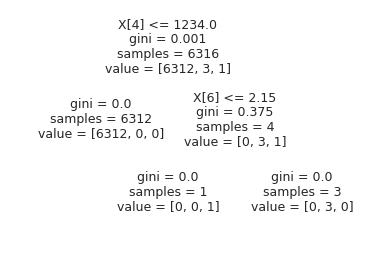

In [183]:
#Use tree to visualize
tree.plot_tree(clf.fit(X_train,y_train))

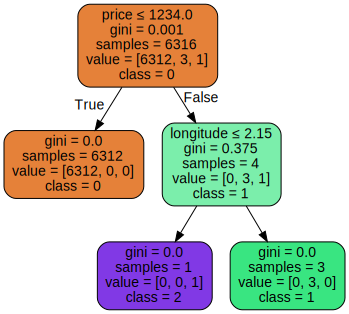

In [184]:
#Use graphviz to visualize
classes = ['0','1','2']
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,  
                     class_names=classes,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

#### 4.2 Support Vector Machine

In [185]:
from sklearn import svm

#Create SVM object
clf_svm = svm.SVC()

#Train SVM dataset
clf_svm.fit(X_train,y_train)

#Predict SVM dataset
y_pred_svm = clf_svm.predict(X_test)

#Show the parameters
clf_svm.get_params

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>

In [186]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.9996833940161469


##### the value of degree_range

In [0]:
# Import
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
pkernel = ['linear', 'rbf', 'poly']

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(kernel=pkernel)

# instantiate the grid
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

In [0]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

In [0]:
def svc_param_selection(X, y):
  #nfolds = 3
  Cs = [0.001, 0.01, 0.1, 1, 10]
  gammas = [0.001, 0.01, 0.1, 1]
  param_grid = {'C': Cs, 'gamma' : gammas}
  
  grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid)
  grid_search.fit(X, y)
  best_parameters = grid_search.best_params_
  
  print (best_parameters)

In [0]:
svc_param_selection(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

{'C': 0.001, 'gamma': 0.001}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 4.3 Nerest neighbors